In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fullrank_images(matrices, nSample, shape=0.1):
    nSig, nMic, nMic = matrices.shape
    h = np.random.gamma(shape=shape, scale=1, size=(nSig, nSample))
    images = np.empty((nSig, nMic, nSample))
    zero = np.zeros(nMic)
    for n in range(nSig):
        R = matrices[n]
        for j in range(nSample):
            images[n,:,j] = np.random.multivariate_normal(zero, h[n,j]*R)
    return images

In [3]:
# Full-rank matrices Rs
ARscale = 2
eyeScale = 0.02
A = np.array([[1, 0.4, 0.7], [0.2, 0.8, -0.5]])
Rs = []
for n in range(A.shape[1]):
    R = ARscale*np.outer(A[:,n], A[:,n]) + eyeScale*np.eye(A.shape[0])
    Rs.append(R)
Rs = np.array(Rs)

In [4]:
# images and mixtures
c = fullrank_images(Rs, 4000, shape=0.01)
x = c.sum(axis=0)

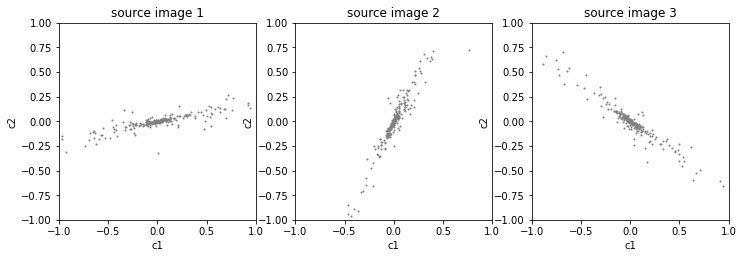

In [5]:
# plot images
nSig = c.shape[0]
plt.figure(figsize=(12,4))
for i in range(nSig):
    plt.subplot(1, nSig, i+1)
    plt.title(f'source image {i+1}')
    plt.plot(c[i,0], c[i,1], '.', markersize=2, color='grey')
    plt.xlabel('c1'), plt.ylabel('c2')
    plt.axis('square')
    plt.axis([-1, 1, -1, 1])
plt.savefig('fullrank_images.png')

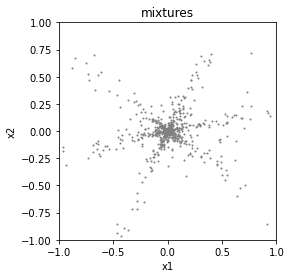

In [6]:
# plot mixtures
plt.figure(figsize=(5,4))
plt.title('mixtures')
plt.plot(x[0], x[1], '.', markersize=2, color='grey')
plt.xlabel('x1'), plt.ylabel('x2')
plt.axis('square')
plt.axis([-1, 1, -1, 1])
plt.savefig('fullrank_mixtures.png')